## Exploratory Data Analysis - Global Terrorism

Problem Statement : As a security/defence analyst, try to find out the hot zone of terrorism,what all security issuses and insights you can derive by EDA?

### Importing all the libraries required for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data sets

df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='latin-1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Note: It contains more columns , so we will rename the columns name for better understanding

In [5]:
df.rename(columns={'eventid':'EventId','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
# Extract necessary columns for further processing
data=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Group','Target_type','Weapon_type']]

In [7]:
data.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [8]:
data.shape

(181691, 16)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 22.2+ MB


In [10]:
# calcute missing values in percentage by using mean
data.isnull().mean()*100

Year           0.000000
Month          0.000000
Day            0.000000
Country        0.000000
state          0.231712
Region         0.000000
city           0.238867
latitude       2.507554
longitude      2.508104
AttackType     0.000000
Killed         5.676120
Wounded        8.977330
Target         0.350045
Group          0.000000
Target_type    0.000000
Weapon_type    0.000000
dtype: float64

In [11]:
data['Killed']=data['Killed'].fillna(0)
data['Wounded']=data['Wounded'].fillna(0)
data['city']=data['city'].fillna(0)
data['state']=data['state'].fillna(0)
data['casualities']=data['Killed']+data['Wounded']

In [12]:
data.isnull().mean()*100

Year           0.000000
Month          0.000000
Day            0.000000
Country        0.000000
state          0.000000
Region         0.000000
city           0.000000
latitude       2.507554
longitude      2.508104
AttackType     0.000000
Killed         0.000000
Wounded        0.000000
Target         0.350045
Group          0.000000
Target_type    0.000000
Weapon_type    0.000000
casualities    0.000000
dtype: float64

In [13]:
# export dataframe to excel format
data.to_excel(r'C:\Users\mnaga\Task 4 Data.xlsx',index=False)

In [14]:
data.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


### Observations:

1. Maximum number of people killed in an event : 1570
2. Maximum number of people wounded in an event : 8191

In [15]:
## to calculate total no of people killed
total_killed = data['Killed'].sum()

# Display the total killed count
print("Total number of pepole killed due to terrorist attack:",total_killed)

Total number of pepole killed due to terrorist attack: 411868.0


In [16]:
## to calculate total no of people wounded
total_Wounded = data['Wounded'].sum()

# Display the total killed count
print("Total number of pepole Wounded due to terrorist attack:",total_Wounded)

Total number of pepole Wounded due to terrorist attack: 523869.0


### 1.Country wise attack

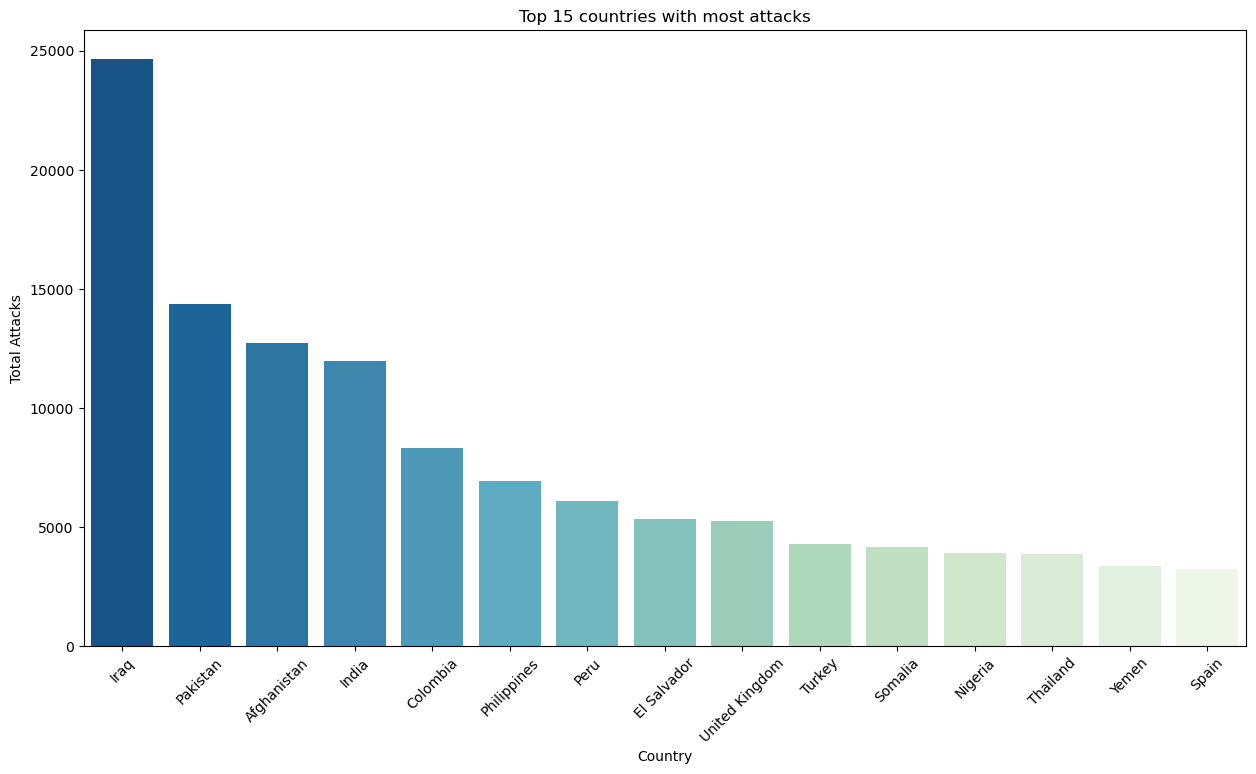

In [17]:

plt.figure(figsize=(15, 8))
sns.barplot(data=data['Country'].value_counts()[:15].reset_index(), x='index', y='Country', palette='GnBu_r')

# Set labels and title

plt.xlabel('Country')
plt.ylabel('Total Attacks')
plt.title('Top 15 countries with most attacks')
plt.xticks(rotation=45)
plt.show()

#### observations:

1.  Most number of attacks :24636 in Iraq 

### 2.Terrorist Activities by Region in each year

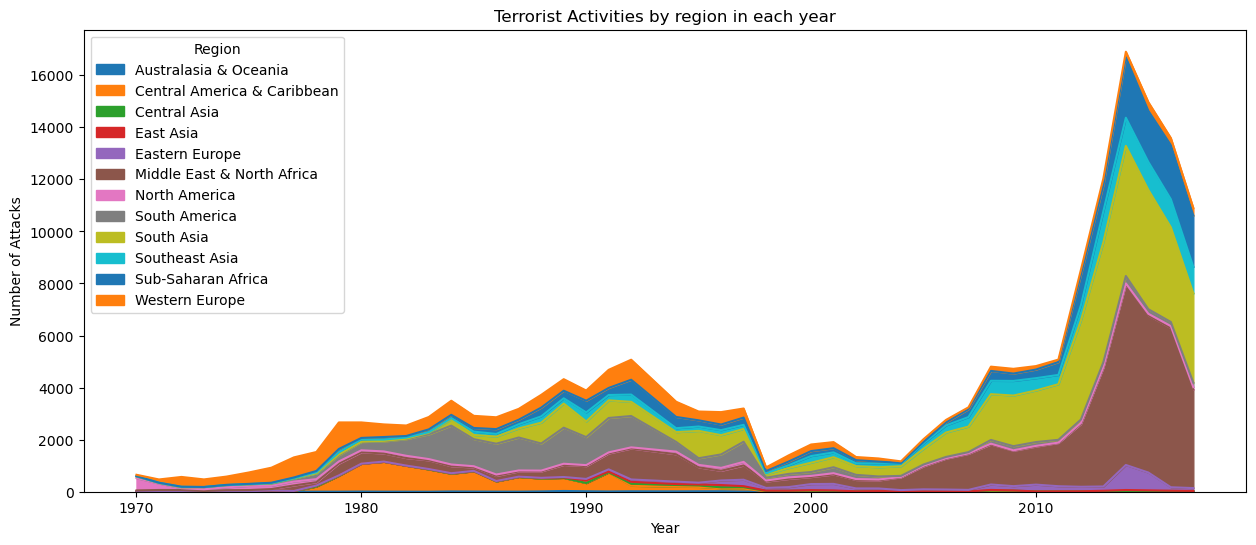

In [18]:
pd.crosstab(data['Year'],data['Region']).plot(kind='area',figsize=(15,6))
plt.ylabel('Number of Attacks')
plt.title('Terrorist Activities by region in each year')
plt.show()

#### Observations: 

1. Most number of attacks in 'Middle East & North Africa" in each year.
2. least number of attacks in "Australasia & oceania

### 3.Number of Terrorist Activities each year

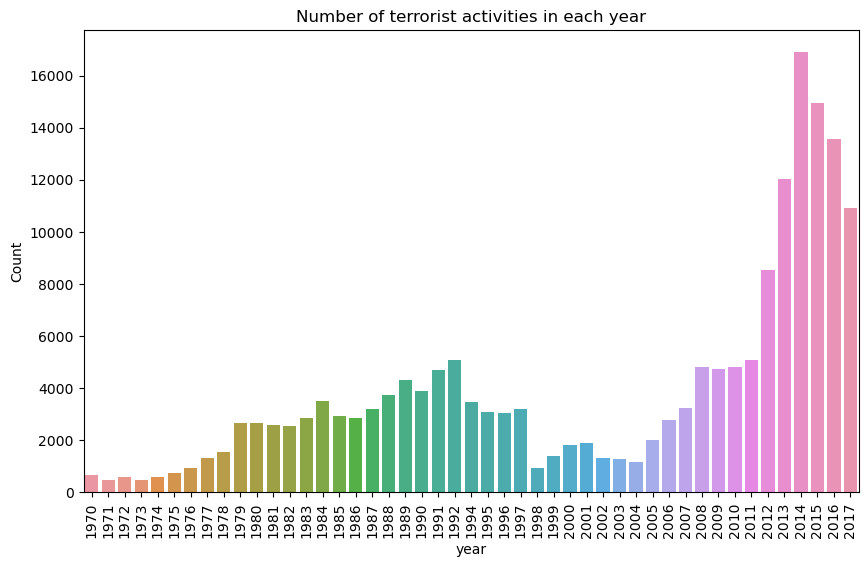

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Year')
plt.title('Number of terrorist activities in each year')
plt.xlabel('year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### Observations:

1. most number of attacks done in 2014 with 85618
2. least number of attacks done in 1971 with 255

### 4.Methods of Attack

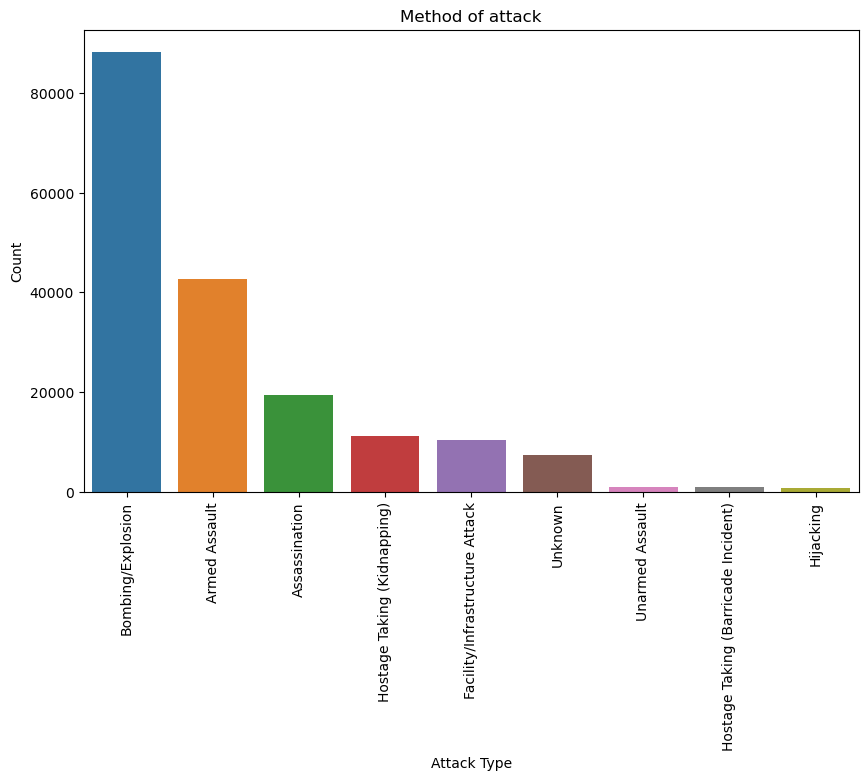

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='AttackType', order=data['AttackType'].value_counts().index)
plt.title('Method of attack')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### Observations: 

1. most attacks are done by Bombing/Explosion (88255)
2. least number of attacks done by "Hijacking" (659)

### 5. Type of attack

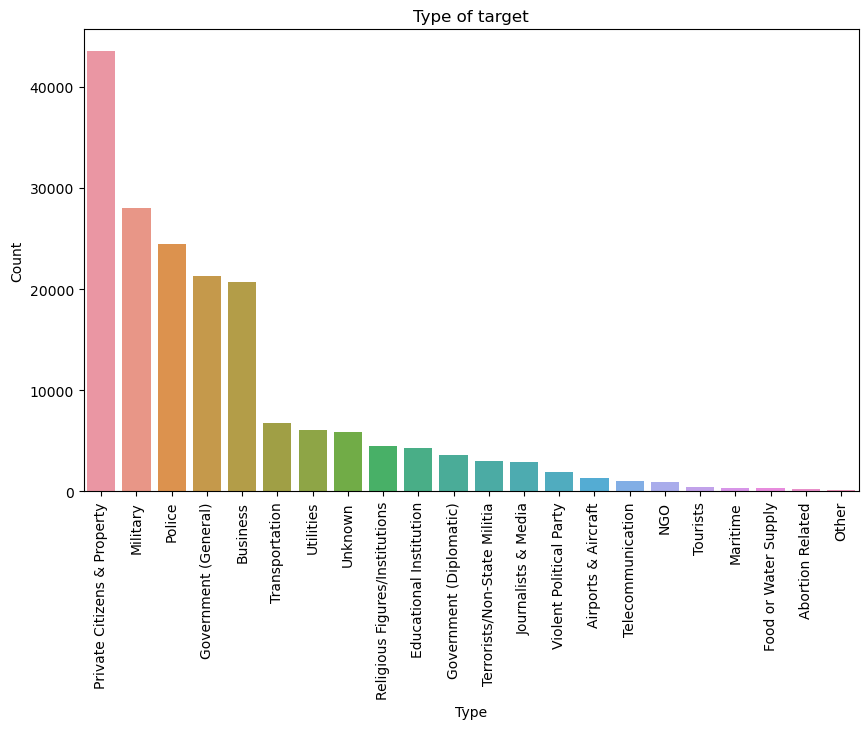

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Target_type', order=data['Target_type'].value_counts().index)
plt.title('Type of target')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### Observations:

1. Most attacks are done on private citizens & property

### 6. Now lets check  total number of attacks by terrorist group

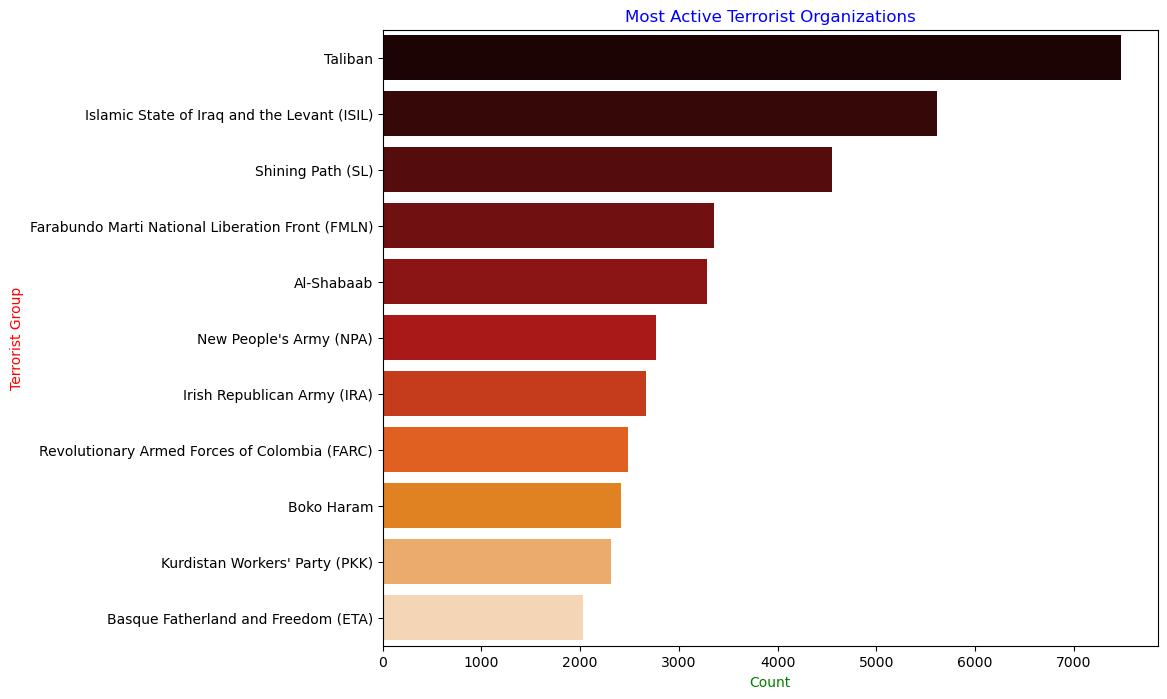

In [22]:
plt.figure(figsize=(10, 8))
top_groups = data['Group'].value_counts()[1:12]
sns.barplot(y=top_groups.index, x=top_groups.values, palette='gist_heat')
plt.title('Most Active Terrorist Organizations', color='blue')  # Change title color to blue
plt.xlabel('Count', color='green')  # Change xlabel color to green
plt.ylabel('Terrorist Group', color='red')  # Change ylabel color to red
plt.show()

#### Observations:

1. Most attacks done by "Taliban" Terrorist Group with 7478
2. Least attacks done by "Tehrik-i-taliban Pakistan(TTp)" Terrorist Group with 1351

### 7. Global view of terrorists attacks 

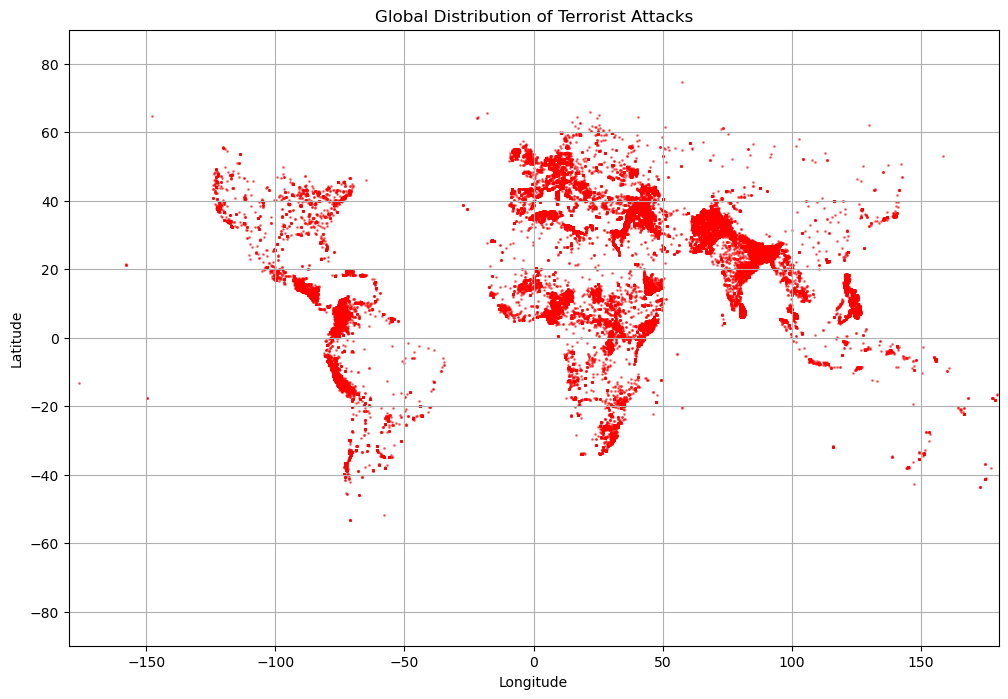

In [23]:
plt.figure(figsize=(12, 8))

# Extract latitude and longitude data from your dataset 
# Create a scatter plot with red dots for each attack
plt.scatter(x='longitude', y='latitude',data=data, color='red', s=1, alpha=0.5)

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Global Distribution of Terrorist Attacks')

# Set limits for better visualization (adjust as needed)
plt.xlim(-180, 180)
plt.ylim(-90, 90)

# Show the plot
plt.grid(True)
plt.show()


### Insights derived from the above EDA:

1. Attacks has increased but number of people killed manier times as attack happened.
2. Iraq has the most attacks.
3. The Middle East and North Africa Regions has most taregeted.
4. Maximum number of attacks are from Bombing/Explosions.
5. There are maximum number of attacks in Private citizens and Property.
6. Taliban and ISIL has a most active organisation.